Problem Statement: Store Sales Forecasting
https://www.kaggle.com/competitions/store-sales-time-series-forecasting/overview

In [72]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [4]:
# Loading the dataset
train =pd.read_csv("/content/drive/MyDrive/store-sales-time-series-forecasting/train.csv")
test=pd.read_csv("/content/drive/MyDrive/store-sales-time-series-forecasting/test.csv")
oil=pd.read_csv("/content/drive/MyDrive/store-sales-time-series-forecasting/oil.csv")
stores=pd.read_csv("/content/drive/MyDrive/store-sales-time-series-forecasting/stores.csv")
transactions=pd.read_csv("/content/drive/MyDrive/store-sales-time-series-forecasting/transactions.csv")
holidays=pd.read_csv("/content/drive/MyDrive/store-sales-time-series-forecasting/holidays_events.csv")

## Data Analysis

In [5]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [6]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [7]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [8]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [9]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [10]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [11]:
# Statistics of each dataframe
print('train data',train.describe())
print('test data',test.describe())
print('oil data',oil.describe())
print('stores data',stores.describe())
print('transactions data',transactions.describe())
print('holidays data',holidays.describe())

train data                  id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00
50%    1.500444e+06  2.750000e+01  1.100000e+01  0.000000e+00
75%    2.250665e+06  4.100000e+01  1.958473e+02  0.000000e+00
max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02
test data                  id     store_nbr   onpromotion
count  2.851200e+04  28512.000000  28512.000000
mean   3.015144e+06     27.500000      6.965383
std    8.230850e+03     15.586057     20.683952
min    3.000888e+06      1.000000      0.000000
25%    3.008016e+06     14.000000      0.000000
50%    3.015144e+06     27.500000      0.000000
75%    3.022271e+06     41.000000      6.000000
max    3.029399e+06     54.000000    

In [12]:
# Finding nan/missing values in dataframes
print('train data',train.isna().sum())
print('test data',test.isna().sum())
print('oil data',oil.isna().sum())
print('stores data',stores.isna().sum())
print('transactions data',transactions.isna().sum())
print('holidays data',holidays.isna().sum())

train data id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
test data id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64
oil data date           0
dcoilwtico    43
dtype: int64
stores data store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
transactions data date            0
store_nbr       0
transactions    0
dtype: int64
holidays data date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


In [13]:
# Shapes and data type of each dataframes
print(f"Train Dataset type and shape: {train.dtypes}, {train.shape}")
print(f"test Dataset type and shape: {test.dtypes}, {test.shape}")
print(f"holidays Dataset type and shape: {holidays.dtypes}, {holidays.shape}")
print(f"oil Dataset type and shape: {oil.dtypes}, {oil.shape}")
print(f"stores Dataset type and shape: {stores.dtypes}, {stores.shape}")
print(f"transactions Dataset type and shape: {transactions.dtypes}, {transactions.shape}")

Train Dataset type and shape: id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object, (3000888, 6)
test Dataset type and shape: id              int64
date           object
store_nbr       int64
family         object
onpromotion     int64
dtype: object, (28512, 5)
holidays Dataset type and shape: date           object
type           object
locale         object
locale_name    object
description    object
transferred      bool
dtype: object, (350, 6)
oil Dataset type and shape: date           object
dcoilwtico    float64
dtype: object, (1218, 2)
stores Dataset type and shape: store_nbr     int64
city         object
state        object
type         object
cluster       int64
dtype: object, (54, 5)
transactions Dataset type and shape: date            object
store_nbr        int64
transactions     int64
dtype: object, (83488, 3)


Observations:


1.   The test data does not contain the sales column.
2.   Oil data has Nan values.
3.   Date is in object dataformat.

We also need to observe how the oil prices, holidays and promotional activities have an impact on the sales of the store.



## Data preprocessing

In [14]:
# Converting the 'date' column to datetime format
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
holidays['date'] = pd.to_datetime(holidays['date'])
oil['date'] = pd.to_datetime(oil['date'])
transactions['date'] = pd.to_datetime(transactions['date'])

In [15]:
# Checking if the training data has all the dates
missing_dates = pd.date_range(train['date'].min(), train['date'].max()).difference(train['date'])

if missing_dates.empty:
    print("The train dataset has all the required dates.")
else:
    print("Some dates are missing:", missing_dates)

Some dates are missing: DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


In [16]:
missing_dates = pd.Index(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]')
missing_data = pd.DataFrame({'date': missing_dates})
# Concatenate the missing and train dataset and reseting the index values
train = pd.concat([train, missing_data], ignore_index=True)
train.sort_values('date', inplace=True)

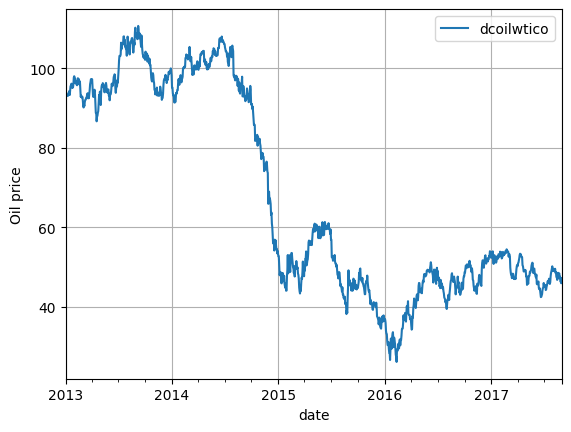

In [95]:
# Visualizing missing values in oil dataframe
oil.plot(x='date', y='dcoilwtico')
plt.xlabel('date')
plt.ylabel('Oil price')
plt.grid(True)
plt.show()

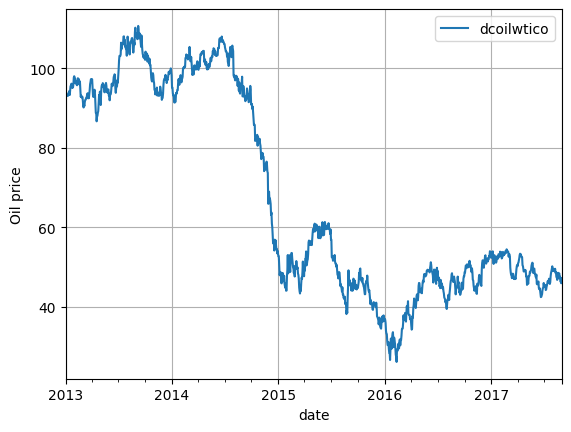

In [96]:
# Using backfill strategy to fill missing values
oil['dcoilwtico'] = oil['dcoilwtico'].fillna(method='backfill')

# plotting the oil dataframe after backfill strategy
oil.plot(x='date', y='dcoilwtico')
plt.xlabel('date')
plt.ylabel('Oil price')
plt.grid(True)
plt.show()

In [19]:
# Create a complete dataframe from all available data frames
complete_df = train.merge(stores, on='store_nbr', how='inner') \
               .merge(transactions, on=['date', 'store_nbr'], how='inner') \
               .merge(holidays, on='date', how='inner') \
               .merge(oil, on='date', how='inner')

complete_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred,dcoilwtico
0,73062.0,2013-02-11,1.0,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
1,73085.0,2013-02-11,1.0,MAGAZINES,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
2,73084.0,2013-02-11,1.0,"LIQUOR,WINE,BEER",21.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
3,73083.0,2013-02-11,1.0,LINGERIE,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
4,73082.0,2013-02-11,1.0,LAWN AND GARDEN,3.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01


In [22]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322047 entries, 0 to 322046
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            322047 non-null  float64       
 1   date          322047 non-null  datetime64[ns]
 2   store_nbr     322047 non-null  float64       
 3   family        322047 non-null  object        
 4   sales         322047 non-null  float64       
 5   onpromotion   322047 non-null  float64       
 6   city          322047 non-null  object        
 7   state         322047 non-null  object        
 8   type_x        322047 non-null  object        
 9   cluster       322047 non-null  int64         
 10  transactions  322047 non-null  int64         
 11  type_y        322047 non-null  object        
 12  locale        322047 non-null  object        
 13  locale_name   322047 non-null  object        
 14  description   322047 non-null  object        
 15  transferred   322

The merging operation has created 2 unknown column, we need to identify what they were originally and change back the column names

In [23]:
# Check the unique values of the two unknown columns
print("Elements of type_x:", complete_df['type_x'].unique())
print("Elements of'type_y:", complete_df['type_y'].unique())

Elements of type_x: ['D' 'E' 'C' 'A' 'B']
Elements of'type_y: ['Holiday' 'Additional' 'Transfer' 'Event' 'Bridge']


In [24]:
# Rename the type_x and type_y columns to original column names
complete_df = complete_df.rename(columns={"type_x": "store_type", "type_y": "holiday_type"})

In [25]:
# Checking null, duplicate values on the complete dataframe
print('Null values in complete dataframe',complete_df.isna().sum())
print('Duplicate values in complete dataframe',complete_df.duplicated().sum())

Null values in complete dataframe id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
city            0
state           0
store_type      0
cluster         0
transactions    0
holiday_type    0
locale          0
locale_name     0
description     0
transferred     0
dcoilwtico      0
dtype: int64
Duplicate values in complete dataframe 0


In [54]:
# Creating a duplicate of original dataframe for analysis purpose
training_df = complete_df.copy()

## Plotting features for understanding dataset

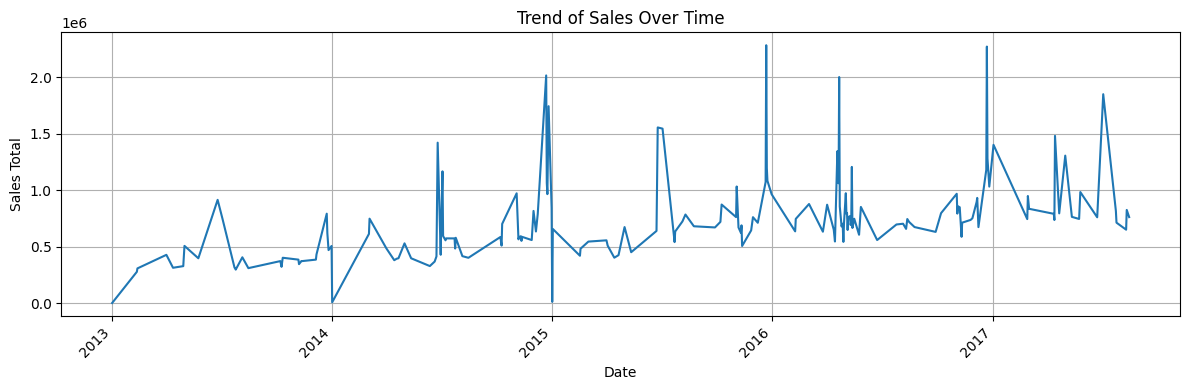

In [27]:
# Plotting sales vs time
daily_sales = training_df.groupby('date')['sales'].sum().reset_index()
daily_sales.set_index('date', inplace=True)

# Create the time series plot
plt.figure(figsize=(12, 4))
plt.plot(daily_sales['sales'])
plt.title('Trend of Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Total')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

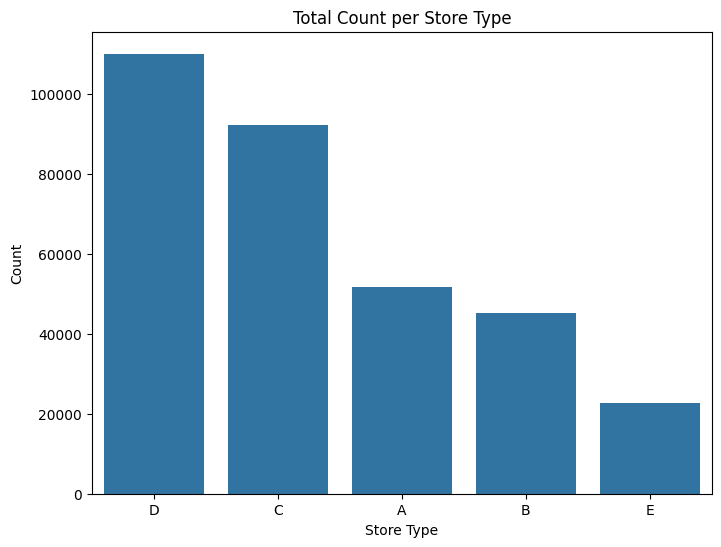

In [28]:
# Calculate the total count per store type
store_type_counts = training_df['store_type'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=store_type_counts.index, y=store_type_counts.values)
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.title('Total Count per Store Type')
plt.show()

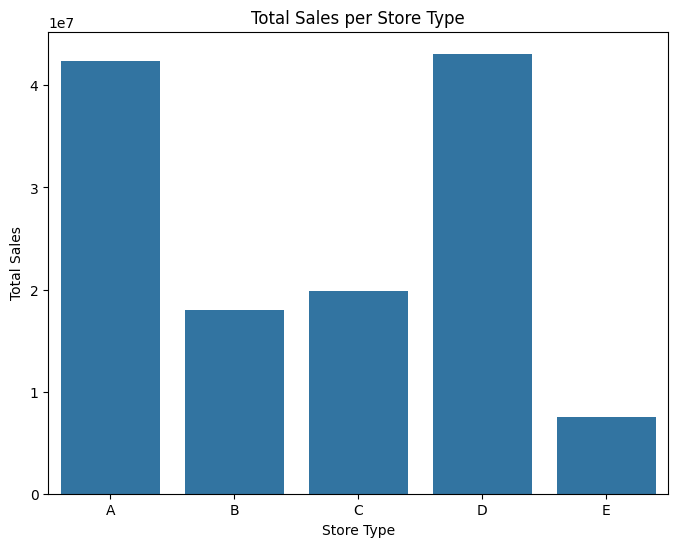

In [29]:
# # Calculate the total sales per store type
store_type_sales = training_df.groupby('store_type')['sales'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=store_type_sales.index, y=store_type_sales.values, order=store_type_sales.index)
plt.xlabel('Store Type')
plt.ylabel('Total Sales')
plt.title('Total Sales per Store Type')
plt.show()

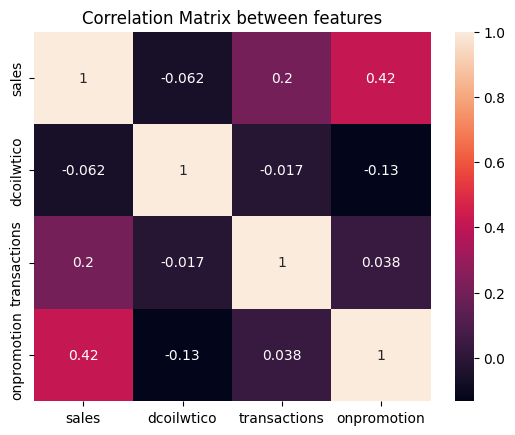

In [30]:
# Finding correlation between sales, oil prices, transactions, holidays
numerical_vars = ['sales', 'dcoilwtico', 'transactions', 'onpromotion']
corr_matrix = training_df[numerical_vars].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix between features')
plt.show()

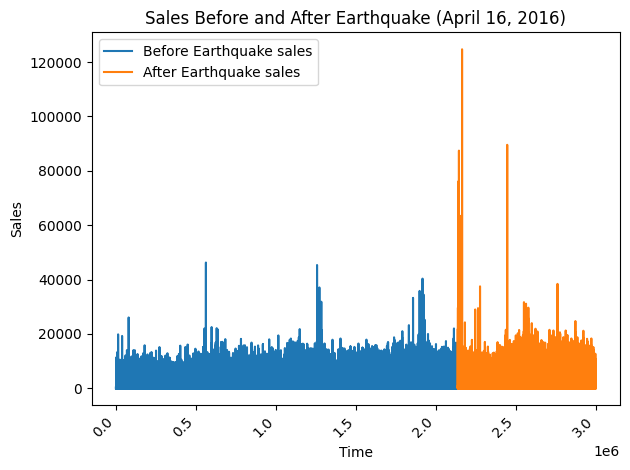

In [31]:
# Analyzing impact of earthquake on sales (earthquake struck on April 16, 2016)
earthquake_date = pd.to_datetime('2016-04-16')

sales_before_earthquake = train.loc[train['date'] < earthquake_date, 'sales']
sales_after_earthquake = train.loc[train['date'] > earthquake_date, 'sales']

plt.plot(sales_before_earthquake, label='Before Earthquake sales')
plt.plot(sales_after_earthquake, label='After Earthquake sales')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Sales Before and After Earthquake (April 16, 2016)')
plt.tight_layout()
plt.legend()
plt.show()

Observations:

1.   The oil price vs date plot shows a huge dip in oil price after mid 2014 but we need to check the correlation between sales and oil prices
2.   The sales plot shows some seasonality based on visual inspection. It can also be observed that higher sales are observed at the end of each year and then the sales drop at the beginning of new year.
3.   Store D has leads in total sales and total count wrt to other stores.
4.   Sales and oil prices have very weak correlation. Transactions and sales have weak positive correlation. Promotions have high positive correlation with sales indicating that sales increasing when promotions are done.
5.   Sales significantly increased after the earthquake, after a while the sales normalized back to its original levels.



## Analyzing the variations in sales based on year, month, days of week

In [55]:
training_df['date'] = pd.to_datetime(training_df['date'])
training_df['year'] = training_df['date'].dt.year
training_df['month'] = training_df['date'].dt.month
training_df['day'] = training_df['date'].dt.day

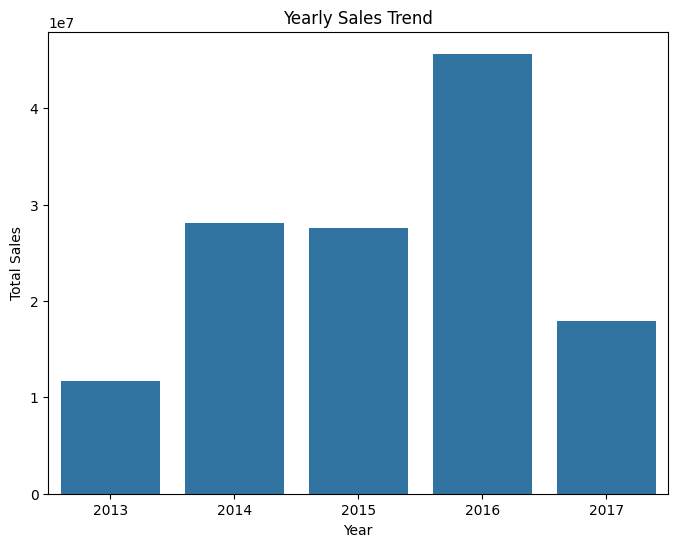

In [56]:
# Yearly Sales Trend
yearly_sales = training_df.groupby('year')['sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=yearly_sales, x='year', y='sales')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

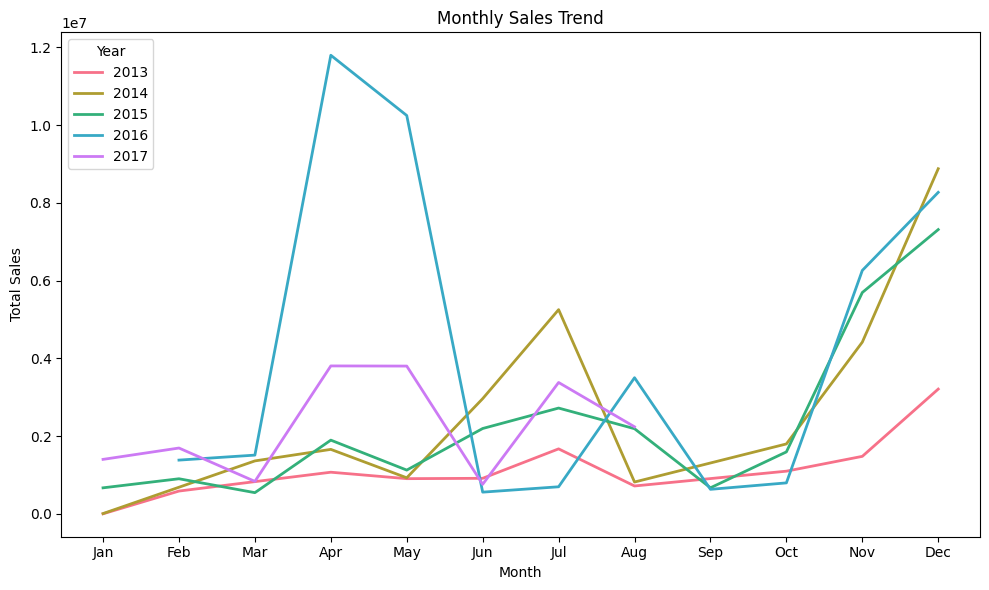

In [57]:
# Monthly Sales Trend
colors = sns.color_palette("husl", n_colors=len(training_df['year'].unique()))
monthly_sales = (training_df.groupby(['year', 'month'])['sales'].sum().reset_index())
plt.figure(figsize=(10, 6))

sns.lineplot(x="month",
    y="sales",
    hue="year",
    palette=colors,
    data=monthly_sales,
    linewidth=2,
)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.tight_layout()
plt.show()

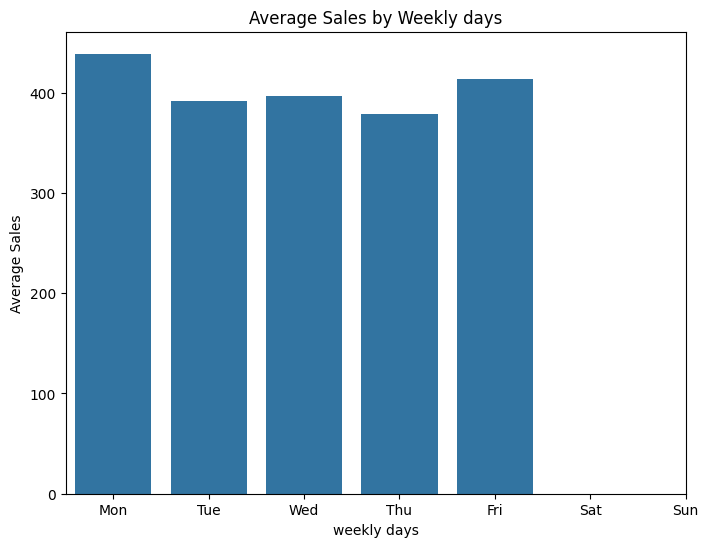

In [58]:
# Daily Sales Trend
day_of_week_sales = training_df.groupby(training_df['date'].dt.dayofweek)['sales'].mean().reset_index()
day_of_week_sales.columns = ['Weekly_days', 'avg_sales']

plt.figure(figsize=(8, 6))
sns.barplot(x='Weekly_days', y='avg_sales', data=day_of_week_sales)
plt.title('Average Sales by Weekly days')
plt.xlabel('weekly days')
plt.ylabel('Average Sales')
plt.xticks(range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

Observations:


1.   2016 had the highest sales (the same year earthquake struck)
2.   Sales increase from Oct till Dec and then falls sharply.
3.   Saturdays and Sundays have least sales.



## Data preprocessing

In [59]:
training_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico,year,month,day
0,73062.0,2013-02-11,1.0,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11
1,73085.0,2013-02-11,1.0,MAGAZINES,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11
2,73084.0,2013-02-11,1.0,"LIQUOR,WINE,BEER",21.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11
3,73083.0,2013-02-11,1.0,LINGERIE,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11
4,73082.0,2013-02-11,1.0,LAWN AND GARDEN,3.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11


In [60]:
# Droping columns not deemed useful for training
columns_to_drop = ['id', 'date',  'state', 'store_type', 'locale', 'locale_name', 'description', 'transferred']
training_df = training_df.drop(columns=columns_to_drop)

In [61]:
# Scaling features
scaler = StandardScaler()
cols_to_scale = ['sales', 'transactions', 'dcoilwtico']
training_df[cols_to_scale] = scaler.fit_transform(training_df[cols_to_scale])

In [62]:
# Encoding categorical features
categorical_columns = ["family", "city", "holiday_type"]
encoder = OneHotEncoder()
one_hot_encoded_data = encoder.fit_transform(training_df[categorical_columns])

column_names = encoder.get_feature_names_out(categorical_columns)
training_df_encoded = pd.DataFrame(one_hot_encoded_data.toarray(), columns=column_names)

# Concatenate the original dataframe with the one-hot encoded data
training_df_encoded = pd.concat([training_df, training_df_encoded], axis=1)
# Drop the original categorical columns
training_df_encoded.drop(categorical_columns, axis=1, inplace=True)
training_df_encoded.head()

,store_nbr,sales,onpromotion,cluster,transactions,dcoilwtico,year,month,day,family_AUTOMOTIVE,...,city_Quevedo,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo,holiday_type_Additional,holiday_type_Bridge,holiday_type_Event,holiday_type_Holiday,holiday_type_Transfer
0,1.0,-0.325920,0.0,13,-1.273993,1.342694,2013,2,11,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,-0.325920,0.0,13,-1.273993,1.342694,2013,2,11,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,-0.309078,0.0,13,-1.273993,1.342694,2013,2,11,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,-0.325920,0.0,13,-1.273993,1.342694,2013,2,11,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,-0.323514,0.0,13,-1.273993,1.342694,2013,2,11,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
# Performing the same operations for test dataset
test['date'] = pd.to_datetime(test['date'])
test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day
test.head()

,id,date,store_nbr,family,onpromotion,year,month,day
0,3000888,2017-08-16,1,AUTOMOTIVE,0,2017,8,16
1,3000889,2017-08-16,1,BABY CARE,0,2017,8,16
2,3000890,2017-08-16,1,BEAUTY,2,2017,8,16
3,3000891,2017-08-16,1,BEVERAGES,20,2017,8,16
4,3000892,2017-08-16,1,BOOKS,0,2017,8,16


In [64]:
# Dropping Columns
columns_to_drop = ['date', 'id']
test = test.drop(columns=columns_to_drop)
test.head()

,store_nbr,family,onpromotion,year,month,day
0,1,AUTOMOTIVE,0,2017,8,16
1,1,BABY CARE,0,2017,8,16
2,1,BEAUTY,2,2017,8,16
3,1,BEVERAGES,20,2017,8,16
4,1,BOOKS,0,2017,8,16


In [65]:
# Encoding The Categorical Variables
categorical_columns = ["family"]
one_hot_encoded_data = encoder.fit_transform(test[categorical_columns])
column_names = encoder.get_feature_names_out(categorical_columns)
test_df_encoded = pd.DataFrame(one_hot_encoded_data.toarray(), columns=column_names)
test_df_encoded = pd.concat([test, test_df_encoded], axis=1)

# Drop the original categorical columns since they have been encoded
test_df_encoded.drop(categorical_columns, axis=1, inplace=True)
test_df_encoded.head()

,store_nbr,onpromotion,year,month,day,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,...,family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
0,1,0,2017,8,16,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,2017,8,16,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2,2017,8,16,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,20,2017,8,16,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,2017,8,16,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modeling

In [67]:
train_set = training_df_encoded.loc[training_df_encoded['year'].isin([2013, 2014, 2015, 2016])]
eval_set = training_df_encoded.loc[training_df_encoded['year'] == 2017]

In [68]:
X_train = train_set.drop('sales', axis=1)
y_train = train_set['sales']

X_eval = eval_set.drop('sales', axis=1)
y_eval = eval_set['sales']

In [91]:
results_df = pd.DataFrame(columns=['Model', 'RMSLE'])

## Linear Regression

In [86]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_eval)

lr_rmsle = np.sqrt(mean_squared_log_error(abs(y_eval), abs(lr_predictions)))
results_lr = {'Model': 'Linear Regression', 'RMSLE': lr_rmsle}
print('linear regression results', results_lr)

linear regression results {'Model': 'Linear Regression', 'RMSLE': 0.18184296838798036}


## Random Forest Regression

In [82]:
# Random Forest Model
rf_model = RandomForestRegressor(random_state=101)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_eval)

rf_rmsle = np.sqrt(mean_squared_log_error(abs(y_eval), abs(rf_predictions)))
results_rf = {'Model': 'Random Forest Model', 'RMSLE': rf_rmsle}
print('Random Forest Regression results', results_rf)

Random Forest Regression results {'Model': 'Random Forest Model', 'RMSLE': 0.10092080781505922}


## Gradient Boosting Regression

In [83]:
# Gradient Boosting Model
gbr_model = GradientBoostingRegressor(random_state=101)
gbr_model.fit(X_train, y_train)
gbr_predictions = gbr_model.predict(X_eval)

gbr_rmsle = np.sqrt(mean_squared_log_error(abs(y_eval), abs(gbr_predictions)))
results_gbr = {'Model': 'Gradient Boosting Model', 'RMSLE': gbr_rmsle}
print('Gradient Boosting Regression results', results_gbr)

Gradient Boosting Regression results {'Model': 'Gradient Boosting Model', 'RMSLE': 0.12570424008069378}


In [92]:
# Display results
results_df = pd.concat([results_df, pd.DataFrame.from_dict([results_lr]), pd.DataFrame.from_dict([results_rf]), pd.DataFrame.from_dict([results_gbr])], ignore_index=True)
results_df

,Model,RMSLE
0,Linear Regression,0.181843
1,Random Forest Model,0.100921
2,Gradient Boosting Model,0.125704


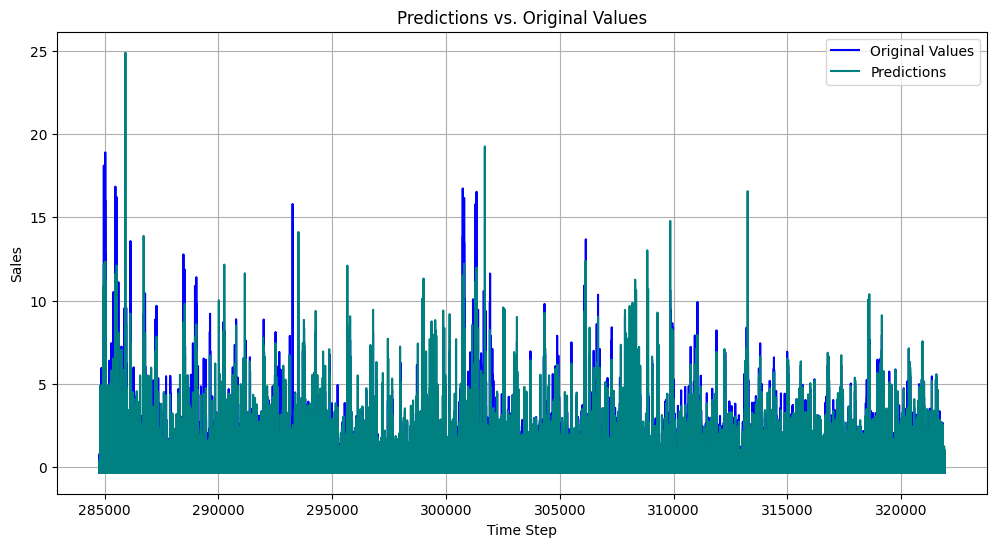

In [110]:
# plotting the predicted vs original value
plt.figure(figsize=(12, 6))
plt.plot(y_eval.index, y_eval.values, label='Original Values', color='blue')
plt.plot(y_eval.index, rf_predictions, label='Predictions', color='teal')
plt.xlabel('Time Step')
plt.ylabel('Sales')
plt.title('Predictions vs. Original Values')
plt.legend()
plt.grid(True)
plt.show()

Based on above results, Random Forest Regressor gives the best results as compared to Linear Regression and Gradient Boosting Regressor. We can try other Models like Support Vector Regression, Decision Tree Regression, ARIMA etc. We can do hyper-parameter tuning on Random Forest Model to obtain even better results.